In [5]:
import pandas as pd
import os
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import climetlab as cml
import cfgrib
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from mymetrics import compute_rmse
from data_utils import extract_temp_pressure_level


In [2]:
data_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/'
fcn_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/fourcastnet/init20220101-lead48-t00-fcn'
pangu_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/pangu/init20220101-lead48-t00-pangu'

In [3]:
pangu0 = f"{pangu_dir}/out-pangu-0.grib"
fcn0 = f"{fcn_dir}/out-fcn-0.grib"

In [4]:
variable = 't'
pressure_level = '500'

In [5]:
pangu0_df = cfgrib.open_datasets(pangu0)[0]
pangu0_df

<xarray.Dataset> Size: 8MB
Dimensions:            (latitude: 721, longitude: 1440)
Coordinates:
    time               datetime64[ns] 8B 2022-01-01
    step               timedelta64[ns] 8B 00:00:00
    heightAboveGround  float64 8B 10.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         datetime64[ns] 8B 2022-01-01
Data variables:
    u10                (latitude, longitude) float32 4MB ...
    v10                (latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [6]:

pangu_df = extract_temp_pressure_level(pangu0, 't', '500')
for i in range(6, 47, 6):
    pangu_df_temp = extract_temp_pressure_level(f"{pangu_dir}/out-pangu-{i}.grib",'t', '500')
    pangu_df = xr.concat([pangu_df, pangu_df_temp], dim="step")
    del pangu_df_temp
pangu_df.to_netcdf(f"{pangu_dir}/out-pangu-all42.nc")

In [7]:
fcn_df = extract_temp_pressure_level(fcn0, 't', '500')
for i in range(6, 47, 6):
    fcn_df_temp = extract_temp_pressure_level(f"{fcn_dir}/out-FCN-{i}.grib", 't', '500')
    fcn_df = xr.concat([fcn_df, fcn_df_temp], dim="step")
    del fcn_df_temp
fcn_df.to_netcdf(f"{fcn_dir}/out-FCN-all.nc")

In [8]:
fcn_df

<xarray.DataArray 't' (step: 8, latitude: 721, longitude: 1440)> Size: 33MB
array([[[234.09976, 234.09976, 234.09976, ..., 234.09976, 234.09976,
         234.09976],
        [233.87418, 233.87515, 233.8771 , ..., 233.8693 , 233.87125,
         233.87222],
        [233.71011, 233.71207, 233.715  , ..., 233.7023 , 233.70425,
         233.70718],
        ...,
        [235.9689 , 235.96988, 235.97086, ..., 235.96695, 235.96793,
         235.9689 ],
        [235.6984 , 235.69937, 235.69937, ..., 235.69644, 235.69742,
         235.69742],
        [235.3605 , 235.3605 , 235.3605 , ..., 235.3605 , 235.3605 ,
         235.3605 ]],

       [[235.17545, 235.08072, 235.02213, ..., 234.66275, 234.61978,
         234.75064],
        [235.15201, 235.07388, 234.90689, ..., 234.6442 , 234.71255,
         234.60025],
        [234.90103, 234.90494, 234.92154, ..., 234.66373, 234.61392,
         234.63834],
...
        [236.8802 , 236.96516, 236.83138, ..., 238.02864, 238.05013,
         237.98567],
        [236.90657, 236.98274, 236.9056 , ..., 237.89485, 237.92805,
         237.90071],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[234.31221, 234.32588, 234.39034, ..., 234.68916, 234.67647,
         234.76045],
        [234.36006, 234.40791, 234.3542 , ..., 234.68721, 234.71944,
         234.66866],
        [234.28877, 234.32784, 234.35323, ..., 234.61494, 234.59639,
         234.6296 ],
        ...,
        [237.61397, 237.67061, 237.55537, ..., 238.36104, 238.43623,
         238.37276],
        [237.58467, 237.64912, 237.58858, ..., 238.10713, 238.17354,
         238.17842],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
  * step           (step) timedelta64[ns] 64B 00:00:00 ... 1 days 18:00:00
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time     (step) datetime64[ns] 64B 2022-01-01 ... 2022-01-02T18:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [9]:
timesteps = len(fcn_df['step'].values)
timesteps

8

In [11]:
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0
era5_12 = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/my_graphcast_dir/data/era5_data/dataset_source-era5_date-2022-01-01_res-0.25_levels-13_steps-12.nc'
ds_era5 = xr.open_dataset(era5_12)
ds_era5

<xarray.Dataset> Size: 5GB
Dimensions:                       (lon: 1440, lat: 721, time: 14, level: 13,
                                   batch: 1)
Coordinates:
  * lon                           (lon) float32 6kB 0.0 0.25 0.5 ... 359.5 359.8
  * lat                           (lat) float32 3kB -90.0 -89.75 ... 89.75 90.0
  * time                          (time) timedelta64[ns] 112B 0 days 00:00:00...
  * level                         (level) int32 52B 50 100 150 ... 850 925 1000
    datetime                      (batch, time) datetime64[ns] 112B ...
Dimensions without coordinates: batch
Data variables: (12/14)
    geopotential_at_surface       (lat, lon) float32 4MB ...
    land_sea_mask                 (lat, lon) float32 4MB ...
    2m_temperature                (batch, time, lat, lon) float32 58MB ...
    mean_sea_level_pressure       (batch, time, lat, lon) float32 58MB ...
    10m_v_component_of_wind       (batch, time, lat, lon) float32 58MB ...
    10m_u_component_of_wind       (batch, time, lat, lon) float32 58MB ...
    ...                            ...
    temperature                   (batch, time, level, lat, lon) float32 756MB ...
    geopotential                  (batch, time, level, lat, lon) float32 756MB ...
    u_component_of_wind           (batch, time, level, lat, lon) float32 756MB ...
    v_component_of_wind           (batch, time, level, lat, lon) float32 756MB ...
    vertical_velocity             (batch, time, level, lat, lon) float32 756MB ...
    specific_humidity             (batch, time, level, lat, lon) float32 756MB ...

In [9]:
# read nc file to xarray

indian_region_era5 = ds_era5.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)
indian_region_era5

<xarray.Dataset> Size: 65MB
Dimensions:                       (lon: 117, lat: 117, time: 14, level: 13,
                                   batch: 1)
Coordinates:
  * lon                           (lon) float32 468B 68.0 68.25 ... 96.75 97.0
  * lat                           (lat) float32 468B 8.0 8.25 8.5 ... 36.75 37.0
  * time                          (time) timedelta64[ns] 112B 0 days 00:00:00...
  * level                         (level) int32 52B 50 100 150 ... 850 925 1000
    datetime                      (batch, time) datetime64[ns] 112B ...
Dimensions without coordinates: batch
Data variables: (12/14)
    geopotential_at_surface       (lat, lon) float32 55kB ...
    land_sea_mask                 (lat, lon) float32 55kB ...
    2m_temperature                (batch, time, lat, lon) float32 767kB ...
    mean_sea_level_pressure       (batch, time, lat, lon) float32 767kB ...
    10m_v_component_of_wind       (batch, time, lat, lon) float32 767kB ...
    10m_u_component_of_wind       (batch, time, lat, lon) float32 767kB ...
    ...                            ...
    temperature                   (batch, time, level, lat, lon) float32 10MB ...
    geopotential                  (batch, time, level, lat, lon) float32 10MB ...
    u_component_of_wind           (batch, time, level, lat, lon) float32 10MB ...
    v_component_of_wind           (batch, time, level, lat, lon) float32 10MB ...
    vertical_velocity             (batch, time, level, lat, lon) float32 10MB ...
    specific_humidity             (batch, time, level, lat, lon) float32 10MB ...

In [12]:
indian_region_era5.to_netcdf('/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/my_graphcast_dir/data/era5_data/indian_region_era5_date-2022-01-01_res-0.25_levels-13_steps-12.nc')

In [ ]:
era5_temp_level500 = ds_era5['temperature'].sel(level=int(pressure_level))
era5_temp_level500
era5_temp_level500 = era5_temp_level500.isel(time=slice(0, timesteps))
era5_temp_level500

<xarray.DataArray 'temperature' (batch: 1, time: 8, lat: 721, lon: 1440)> Size: 33MB
[8305920 values with dtype=float32]
Coordinates:
  * lon       (lon) float32 6kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat       (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time      (time) timedelta64[ns] 64B 00:00:00 06:00:00 ... 1 days 18:00:00
    level     int32 4B 500
    datetime  (batch, time) datetime64[ns] 64B ...
Dimensions without coordinates: batch

In [13]:
indian_region_pangu = pangu_df.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)

indian_region_pangu

<xarray.DataArray 't' (step: 8, latitude: 117, longitude: 117)> Size: 438kB
array([[[251.71304, 251.96695, 252.25406, ..., 249.85855, 249.77945,
         249.673  ],
        [251.84488, 252.02164, 252.27457, ..., 249.99039, 249.94449,
         249.85172],
        [252.01382, 252.11441, 252.2687 , ..., 250.03824, 250.02261,
         249.95328],
        ...,
        [266.60757, 266.62418, 266.64175, ..., 267.57437, 267.62906,
         267.67984],
        [266.64468, 266.6691 , 266.69156, ..., 267.5607 , 267.64468,
         267.72574],
        [266.69254, 266.7189 , 266.74722, ..., 267.54898, 267.65152,
         267.75504]],

       [[250.47656, 250.58594, 250.70117, ..., 249.51953, 249.52246,
         249.60254],
        [250.6416 , 250.73242, 250.84082, ..., 249.62598, 249.61328,
         249.65137],
        [250.78809, 250.87598, 250.95117, ..., 249.71973, 249.69922,
         249.69824],
...
        [267.64154, 267.61615, 267.59174, ..., 268.0937 , 268.09955,
         268.09857],
        [267.68158, 267.6552 , 267.62885, ..., 268.13763, 268.13666,
         268.12494],
        [267.747  , 267.72357, 267.70795, ..., 268.16595, 268.164  ,
         268.12787]],

       [[251.3047 , 251.26466, 251.22462, ..., 250.91408, 250.9131 ,
         250.91994],
        [251.53517, 251.48634, 251.43166, ..., 251.18068, 251.17287,
         251.1426 ],
        [251.7881 , 251.73244, 251.65627, ..., 251.46681, 251.45412,
         251.40529],
        ...,
        [267.39746, 267.38672, 267.3789 , ..., 267.72168, 267.73438,
         267.77344],
        [267.43262, 267.4209 , 267.41016, ..., 267.74902, 267.76367,
         267.81152],
        [267.50586, 267.4961 , 267.4912 , ..., 267.78906, 267.83203,
         267.8457 ]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
  * step           (step) timedelta64[ns] 64B 00:00:00 ... 1 days 18:00:00
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 936B 37.0 36.75 36.5 ... 8.5 8.25 8.0
  * longitude      (longitude) float64 936B 68.0 68.25 68.5 ... 96.5 96.75 97.0
    valid_time     (step) datetime64[ns] 64B 2022-01-01 ... 2022-01-02T18:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [ ]:
indian_region_era5 = era5_temp_level500.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)
indian_region_era5

<xarray.DataArray 'temperature' (batch: 1, time: 8, lat: 117, lon: 117)> Size: 438kB
[109512 values with dtype=float32]
Coordinates:
  * lon       (lon) float32 468B 68.0 68.25 68.5 68.75 ... 96.25 96.5 96.75 97.0
  * lat       (lat) float32 468B 8.0 8.25 8.5 8.75 9.0 ... 36.25 36.5 36.75 37.0
  * time      (time) timedelta64[ns] 64B 00:00:00 06:00:00 ... 1 days 18:00:00
    level     int32 4B 500
    datetime  (batch, time) datetime64[ns] 64B ...
Dimensions without coordinates: batch

In [15]:
# to match the order of latitudes for era5
forecast_flipped_pangu = indian_region_pangu.sel(latitude=indian_region_pangu.latitude[::-1])
forecast_flipped_pangu = forecast_flipped_pangu.rename({'latitude': 'lat', 'longitude': 'lon'})


In [16]:
results_path = "/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/src/ai_models/results/20220101-42hrs/"

In [17]:
# get the data for bounds over India
indian_region_fcn = fcn_df.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)

indian_region_fcn

<xarray.DataArray 't' (step: 8, latitude: 117, longitude: 117)> Size: 438kB
array([[[251.71304, 251.96695, 252.25406, ..., 249.85855, 249.77945,
         249.673  ],
        [251.84488, 252.02164, 252.27457, ..., 249.99039, 249.94449,
         249.85172],
        [252.01382, 252.11441, 252.2687 , ..., 250.03824, 250.02261,
         249.95328],
        ...,
        [266.60757, 266.62418, 266.64175, ..., 267.57437, 267.62906,
         267.67984],
        [266.64468, 266.6691 , 266.69156, ..., 267.5607 , 267.64468,
         267.72574],
        [266.69254, 266.7189 , 266.74722, ..., 267.54898, 267.65152,
         267.75504]],

       [[250.68912, 250.84146, 250.9313 , ..., 249.51236, 249.48404,
         249.5104 ],
        [250.91959, 250.98697, 251.08658, ..., 249.71451, 249.6774 ,
         249.6774 ],
        [251.03384, 251.1774 , 251.25064, ..., 249.90298, 249.85611,
         249.86295],
...
        [267.20148, 267.18878, 267.20148, ..., 267.93976, 267.87042,
         267.82452],
        [267.24835, 267.21808, 267.1634 , ..., 267.9134 , 267.91046,
         267.87628],
        [267.12628, 267.10773, 267.0882 , ..., 267.93976, 267.93292,
         267.92316]],

       [[252.13155, 252.06807, 252.04561, ..., 251.06905, 251.09053,
         251.0915 ],
        [252.4167 , 252.33076, 252.27315, ..., 251.3083 , 251.34541,
         251.36592],
        [252.63252, 252.5671 , 252.48897, ..., 251.54366, 251.52998,
         251.51729],
        ...,
        [266.95868, 266.92743, 266.91766, ..., 267.61298, 267.54364,
         267.5368 ],
        [266.97333, 266.9245 , 266.86395, ..., 267.5661 , 267.56512,
         267.528  ],
        [266.86786, 266.84637, 266.82782, ..., 267.7038 , 267.7204 ,
         267.71063]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
  * step           (step) timedelta64[ns] 64B 00:00:00 ... 1 days 18:00:00
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 936B 37.0 36.75 36.5 ... 8.5 8.25 8.0
  * longitude      (longitude) float64 936B 68.0 68.25 68.5 ... 96.5 96.75 97.0
    valid_time     (step) datetime64[ns] 64B 2022-01-01 ... 2022-01-02T18:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [18]:
forecast_flipped_fcn = indian_region_fcn.sel(latitude=indian_region_fcn.latitude[::-1])
forecast_flipped_fcn = forecast_flipped_fcn.rename({'latitude': 'lat', 'longitude': 'lon'})

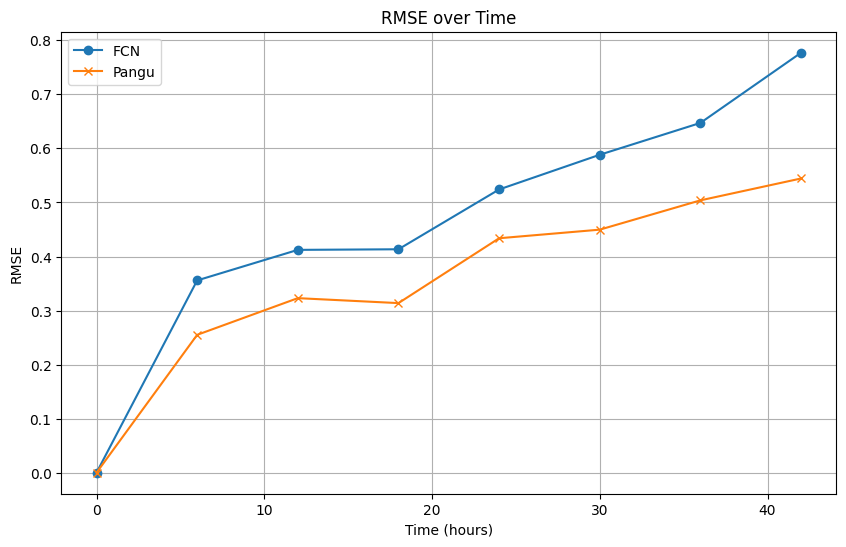

In [20]:
# Lists to store RMSE values
rmse_values_fcn = []
rmse_values_pangu = []
time_steps = []

for i in range(0, 172800000000000, 21600000000000):

    forecast_step_fcn = forecast_flipped_fcn.sel(step=f'{i}')
    india_era5_step = indian_region_era5.sel(time=f'{i}')
    diff_fcn = india_era5_step - forecast_step_fcn
    

    rmse_fcn = np.sqrt(np.mean(diff_fcn**2))
    rmse_values_fcn.append(rmse_fcn)
    

    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, edgecolor='black')
    
    diff_fcn.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6})
    plt.title(f"FCN Difference at step {i/36e11}")
    plt.savefig(f"{results_path}/maps/FCN_diff_plot_step_{i/36e11}.png")
    plt.close()
    
    forecast_step_pangu = forecast_flipped_pangu.sel(step=f'{i}')
    diff_pangu = india_era5_step - forecast_step_pangu
    
    rmse_pangu = np.sqrt(np.mean(diff_pangu**2))
    rmse_values_pangu.append(rmse_pangu)
    time_steps.append(i / 36e11)
    
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, edgecolor='black')
    
    diff_pangu.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6})
    plt.title(f"Pangu Difference at step {i/36e11}")
    plt.savefig(f"{results_path}/maps/Pangu_diff_plot_step_{i/36e11}.png")
    plt.close()

plt.figure(figsize=(10, 6))
plt.plot(time_steps, rmse_values_fcn, marker='o', label='FCN')
plt.plot(time_steps, rmse_values_pangu, marker='x', label='Pangu')
plt.xlabel('Time (hours)')
plt.ylabel('RMSE')
plt.title('RMSE over Time')
plt.legend()
plt.grid(True)
plt.savefig(f"{results_path}/graphs/rmse_plot.png")
plt.show()

rmse_df = pd.DataFrame({
    "time": time_steps,
    "rmse_fcn": rmse_values_fcn,
    "rmse_pangu": rmse_values_pangu
})
rmse_df.to_csv(f"{results_path}/datafiles/rmse_data.csv", index=False)

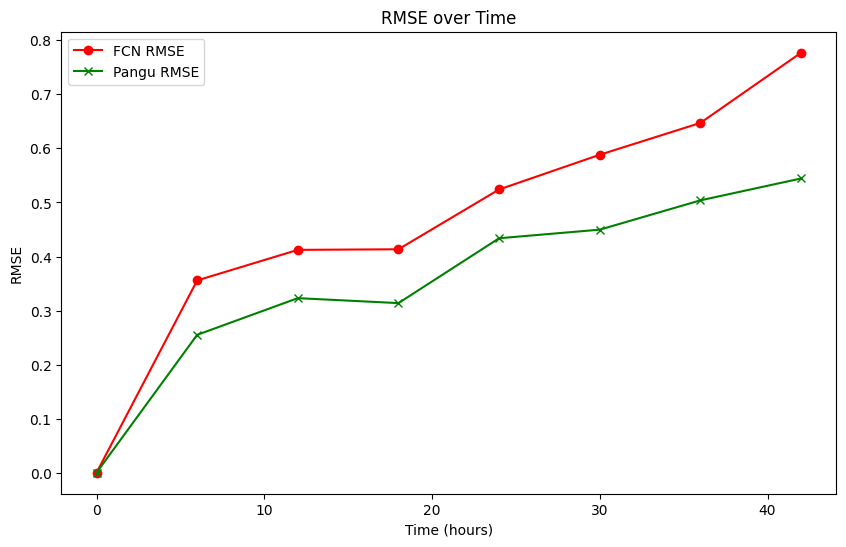

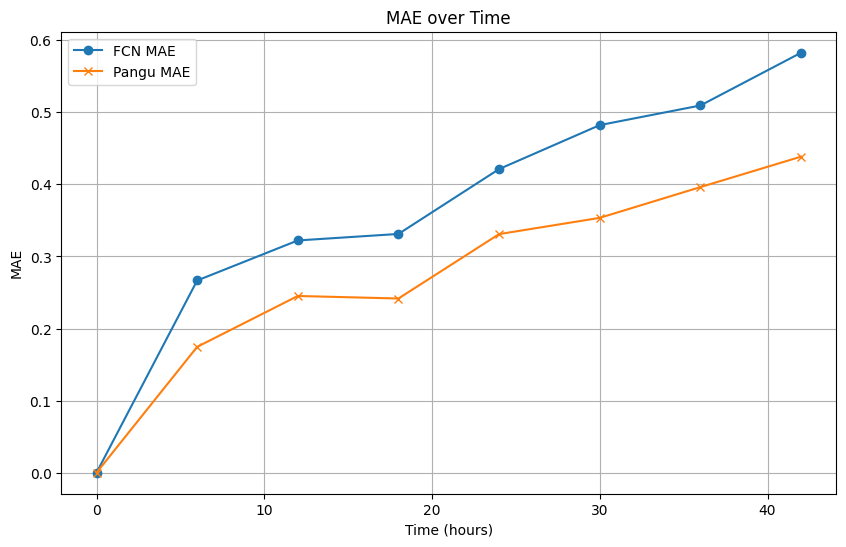

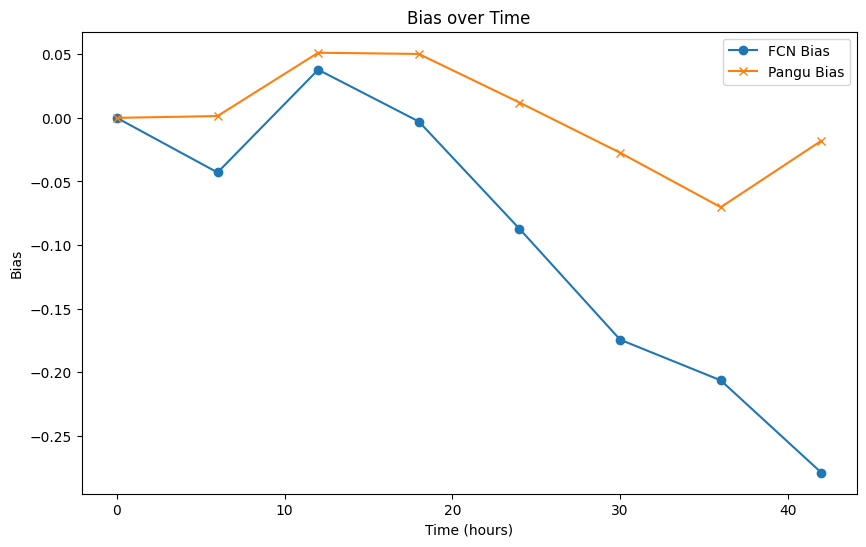

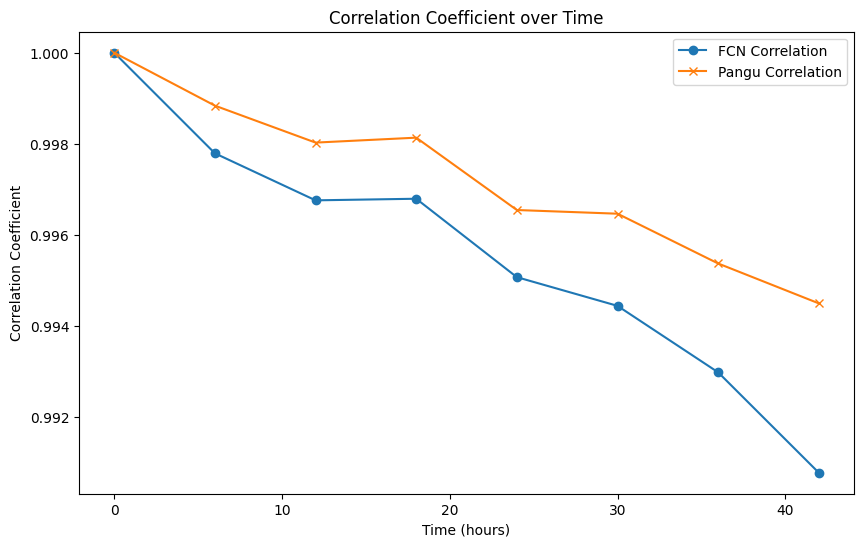

In [22]:
from scipy.stats import pearsonr

# Lists to store metrics
rmse_values_fcn = []
mae_values_fcn = []
bias_values_fcn = []
corr_values_fcn = []

rmse_values_pangu = []
mae_values_pangu = []
bias_values_pangu = []
corr_values_pangu = []

time_steps = []
my_rmse_pangu = []

for i in range(0, 172800000000000, 21600000000000):
    # FCN forecast
    forecast_step_fcn = forecast_flipped_fcn.sel(step=f'{i}')
    india_era5_step = indian_region_era5.sel(time=f'{i}')
    diff_fcn = india_era5_step - forecast_step_fcn
    
    # Calculate RMSE for FCN forecast
    rmse_fcn = np.sqrt(np.mean(diff_fcn**2))
    rmse_values_fcn.append(rmse_fcn)
    
    # Calculate MAE for FCN forecast
    mae_fcn = np.mean(np.abs(diff_fcn))
    mae_values_fcn.append(mae_fcn)

    # Calculate Bias (Mean Error) for FCN forecast
    bias_fcn = np.mean(diff_fcn)
    bias_values_fcn.append(bias_fcn)

    # Calculate Correlation Coefficient for FCN forecast
    # Flatten the arrays and remove NaNs
    era5_flat = india_era5_step.values.flatten()
    fcn_flat = forecast_step_fcn.values.flatten()
    valid_idx = ~np.isnan(era5_flat) & ~np.isnan(fcn_flat)
    if np.any(valid_idx):
        corr_fcn, _ = pearsonr(era5_flat[valid_idx], fcn_flat[valid_idx])
    else:
        corr_fcn = np.nan
    corr_values_fcn.append(corr_fcn)
    
    # Plot the difference for FCN forecast
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, edgecolor='black')
    
    diff_fcn.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6})
    plt.title(f"FCN Difference at step {i/36e11}")
    plt.savefig(f"FCN_diff_plot_step_{i/36e11}.png")
    plt.close()
    
    # Pangu forecast
    forecast_step_pangu = forecast_flipped_pangu.sel(step=f'{i}')
    diff_pangu = india_era5_step - forecast_step_pangu
    
    # Calculate RMSE for Pangu forecast
    rmse_pangu = np.sqrt(np.mean(diff_pangu**2))
    rmse_values_pangu.append(rmse_pangu)

    my_rmse = rmse(india_era5_step, forecast_step_pangu)
    my_rmse_pangu.append(my_rmse)
    
    # Calculate MAE for Pangu forecast
    mae_pangu = np.mean(np.abs(diff_pangu))
    mae_values_pangu.append(mae_pangu)

    # Calculate Bias (Mean Error) for Pangu forecast
    bias_pangu = np.mean(diff_pangu)
    bias_values_pangu.append(bias_pangu)

    # Calculate Correlation Coefficient for Pangu forecast
    pangu_flat = forecast_step_pangu.values.flatten()
    valid_idx = ~np.isnan(era5_flat) & ~np.isnan(pangu_flat)
    if np.any(valid_idx):
        corr_pangu, _ = pearsonr(era5_flat[valid_idx], pangu_flat[valid_idx])
    else:
        corr_pangu = np.nan
    corr_values_pangu.append(corr_pangu)
    
    time_steps.append(i / 36e11)  # Convert time step to hours or desired unit
    
    # Plot the difference for Pangu forecast
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, edgecolor='black')
    
    diff_pangu.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6})
    plt.title(f"Pangu Difference at step {i/36e11}")
    plt.savefig(f"Pangu_diff_plot_step_{i/36e11}.png")
    plt.close()

# Plot RMSE over time for both forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_steps, rmse_values_fcn, marker='o', label='FCN RMSE', color='red')
plt.plot(time_steps, rmse_values_pangu, marker='x', label='Pangu RMSE', color='green')
plt.xlabel('Time (hours)')
plt.ylabel('RMSE')
plt.title('RMSE over Time')
plt.legend()
plt.grid(False)
plt.show()

# Plot MAE over time for both forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_steps, mae_values_fcn, marker='o', label='FCN MAE')
plt.plot(time_steps, mae_values_pangu, marker='x', label='Pangu MAE')
plt.xlabel('Time (hours)')
plt.ylabel('MAE')
plt.title('MAE over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot Bias over time for both forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_steps, bias_values_fcn, marker='o', label='FCN Bias')
plt.plot(time_steps, bias_values_pangu, marker='x', label='Pangu Bias')
plt.xlabel('Time (hours)')
plt.ylabel('Bias')
plt.title('Bias over Time')
plt.legend()
plt.grid(False)
plt.show()

# Plot Correlation Coefficient over time for both forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_steps, corr_values_fcn, marker='o', label='FCN Correlation')
plt.plot(time_steps, corr_values_pangu, marker='x', label='Pangu Correlation')
plt.xlabel('Time (hours)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient over Time')
plt.legend()
plt.grid(False)
plt.show()

# Save the metrics data
metrics_df = pd.DataFrame({
    "time": time_steps,
    "rmse_fcn": rmse_values_fcn,
    "rmse_pangu": rmse_values_pangu,
    "mae_fcn": mae_values_fcn,
    "mae_pangu": mae_values_pangu,
    "bias_fcn": bias_values_fcn,
    "bias_pangu": bias_values_pangu,
    "corr_fcn": corr_values_fcn,
    "corr_pangu": corr_values_pangu
})
metrics_df.to_csv("forecast_metrics.csv", index=False)

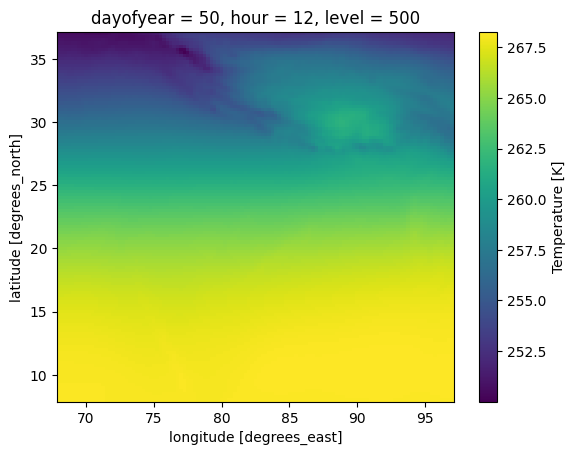

In [23]:
graphs_path = "/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/src/ai_models/results/20220101-42hrs/graphs"
climatology_path = "/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/input_data/era5_climatology_first60days_alllevels"

clim = xr.open_dataset(climatology_path)
clim['temperature'].sel(dayofyear=50, hour=12).plot()

In [24]:
rmse_value_fcn_vals = [rmse_values_fcn[i].values for i in range(len(rmse_values_fcn))]
rmse_value_fcn_vals
rmse_value_pangu_vals = [rmse_values_pangu[i].values for i in range(len(rmse_values_fcn))]
rmse_value_pangu_vals

[array(0.00022809, dtype=float32),
 array(0.25517815, dtype=float32),
 array(0.3230082, dtype=float32),
 array(0.31384373, dtype=float32),
 array(0.43377405, dtype=float32),
 array(0.44964758, dtype=float32),
 array(0.50383645, dtype=float32),
 array(0.5442638, dtype=float32)]

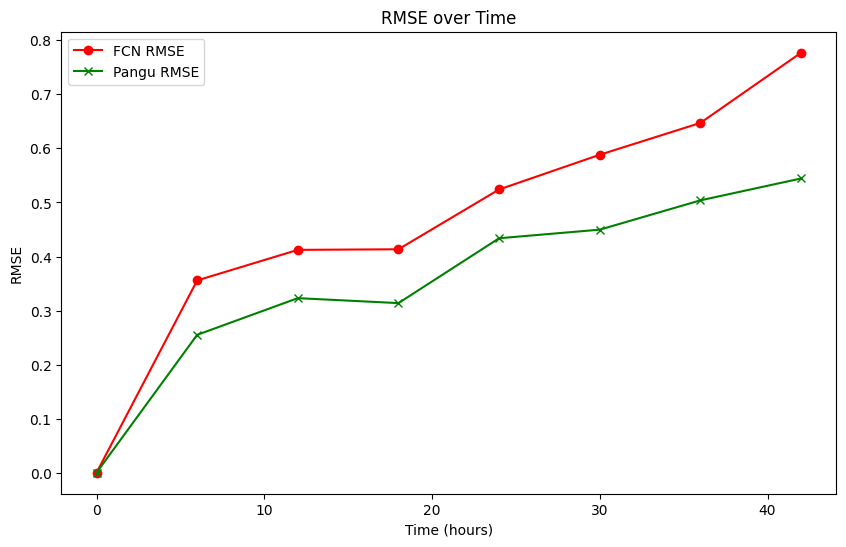

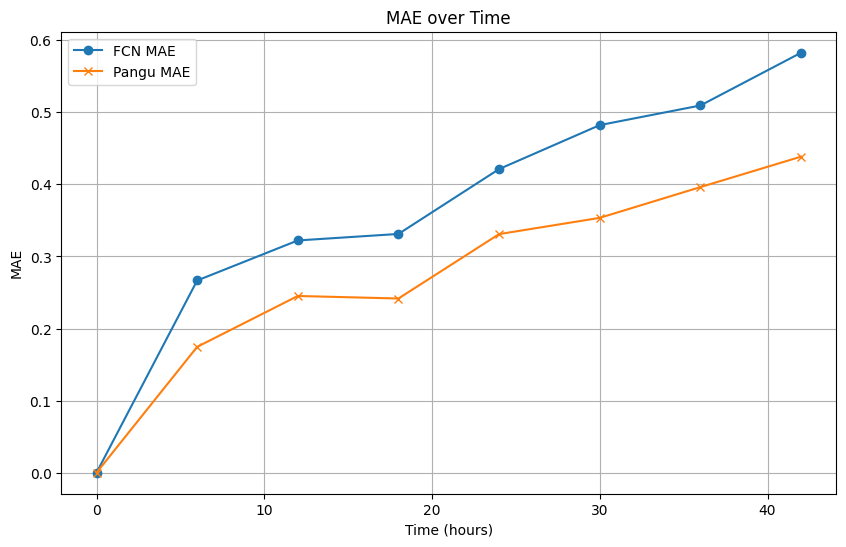

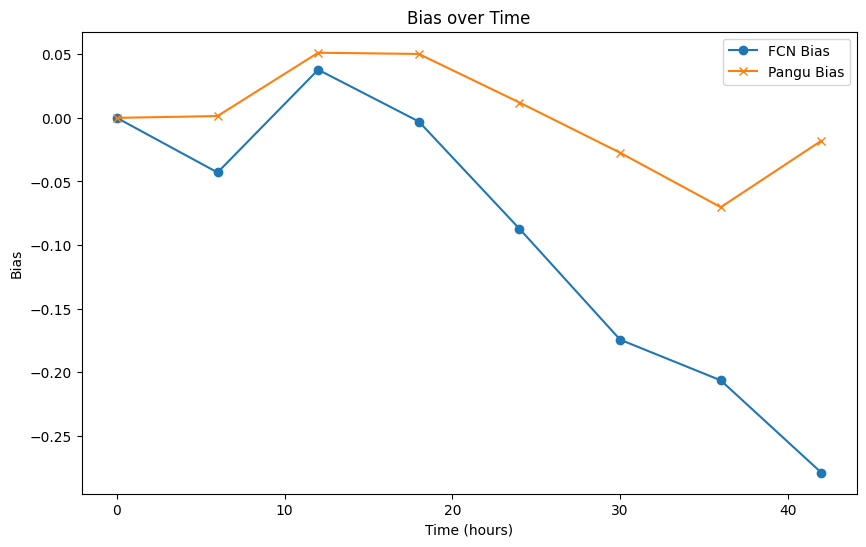

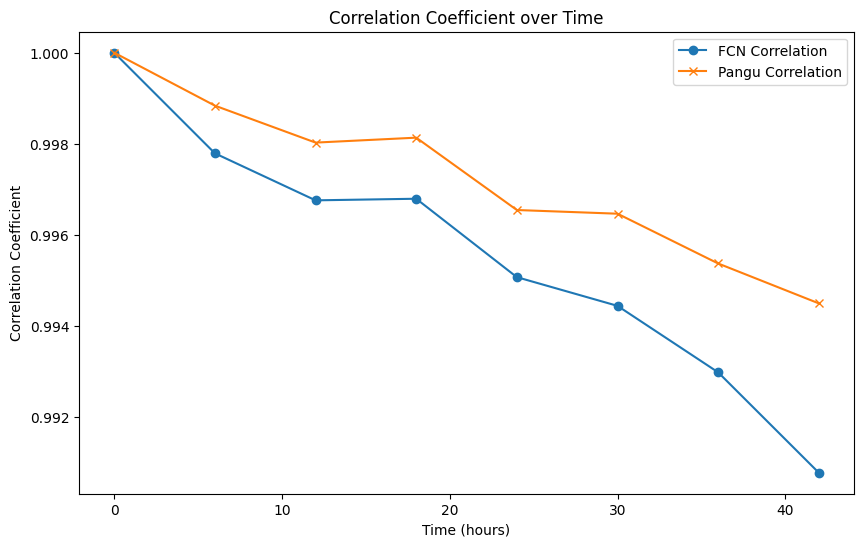

In [25]:

# Plot RMSE over time for both forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_steps, rmse_values_fcn, marker='o', label='FCN RMSE', color='red')
plt.plot(time_steps, rmse_values_pangu, marker='x', label='Pangu RMSE', color='green')
plt.xlabel('Time (hours)')
plt.ylabel('RMSE')
plt.title('RMSE over Time')
plt.legend()
plt.grid(False)
plt.savefig(f"{graphs_path}/rmse_plot.png")
plt.show()

# Plot MAE over time for both forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_steps, mae_values_fcn, marker='o', label='FCN MAE')
plt.plot(time_steps, mae_values_pangu, marker='x', label='Pangu MAE')
plt.xlabel('Time (hours)')
plt.ylabel('MAE')
plt.title('MAE over Time')
plt.legend()
plt.grid(True)
plt.savefig(f"{graphs_path}/mae_plot.png")
plt.show()

# Plot Bias over time for both forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_steps, bias_values_fcn, marker='o', label='FCN Bias')
plt.plot(time_steps, bias_values_pangu, marker='x', label='Pangu Bias')
plt.xlabel('Time (hours)')
plt.ylabel('Bias')
plt.title('Bias over Time')
plt.legend()
plt.grid(False)
plt.savefig(f"{graphs_path}/bias_plot.png")
plt.show()

# Plot Correlation Coefficient over time for both forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_steps, corr_values_fcn, marker='o', label='FCN Correlation')
plt.plot(time_steps, corr_values_pangu, marker='x', label='Pangu Correlation')
plt.xlabel('Time (hours)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient over Time')
plt.legend()
plt.grid(False)
plt.savefig(f"{graphs_path}/correlation_plot.png")
plt.show()

# Save the metrics data
metrics_df = pd.DataFrame({
    "time": time_steps,
    "rmse_fcn": rmse_values_fcn,
    "rmse_pangu": rmse_values_pangu,
    "mae_fcn": mae_values_fcn,
    "mae_pangu": mae_values_pangu,
    "bias_fcn": bias_values_fcn,
    "bias_pangu": bias_values_pangu,
    "corr_fcn": corr_values_fcn,
    "corr_pangu": corr_values_pangu
})
metrics_df.to_csv(os.path.join(results_path, "forecast_metrics.csv"), index=False)

In [26]:
import seaborn as sns
models = ['FCN', 'Pangu']
rmse_values = [rmse_value_fcn_vals, rmse_value_pangu_vals]

# Create a DataFrame for the heatmap
rmse_df = pd.DataFrame(rmse_values, index=models, columns=time_steps)

# each element of this dataframe is a list, convert it to a single value
rmse_df = rmse_df.applymap(lambda x: x[0])

# Plot the heatmap
plt.figure(figsize=(12, 6))
rmse_df
# save to csv
rmse_df.to_csv(os.path.join(results_path, "rmse_heatmap_data.csv"), index=False)

/var/folders/fd/pqhldq7s46j4zcbt6_zktcnh0000gn/T/ipykernel_56679/3894777927.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rmse_df = rmse_df.applymap(lambda x: x[0])


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

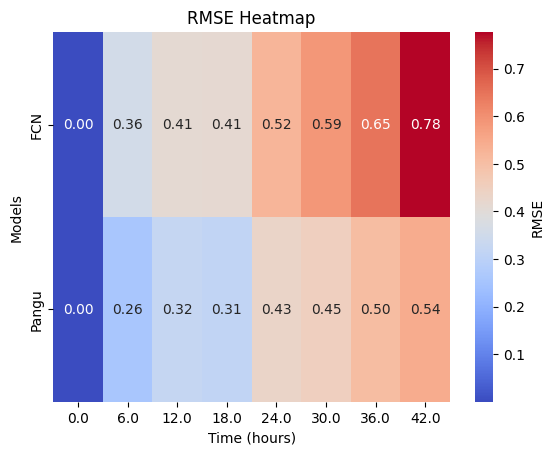

In [ ]:
sns.heatmap(rmse_df, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'RMSE'})
plt.xlabel('Time (hours)')
plt.ylabel('Models')
plt.title('RMSE Heatmap')
plt.savefig(f"{graphs_path}/rmse_heatmap.png")
plt.show()

# Save the metrics data
metrics_df = pd.DataFrame({
    "time": time_steps,
    "rmse_fcn": rmse_values_fcn,
    "rmse_pangu": rmse_values_pangu,
    "mae_fcn": mae_values_fcn,
    "mae_pangu": mae_values_pangu,
    "bias_fcn": bias_values_fcn,
    "bias_pangu": bias_values_pangu,
    "corr_fcn": corr_values_fcn,
    "corr_pangu": corr_values_pangu
})

In [29]:
bias_values_fcn[0]

<xarray.DataArray ()> Size: 4B
array(-2.330786e-06, dtype=float32)
Coordinates:
    level          int32 4B 500
    step           timedelta64[ns] 8B 00:00:00
    isobaricInhPa  float64 8B 500.0
    valid_time     datetime64[ns] 8B 2022-01-01

In [34]:
india_stations = "/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/input_data/india_station_data-202201.csv"
stations_df = pd.read_csv(india_stations)
stations_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
0,IN011150300,"GWALIOR, IN",26.233,78.250,207.0,01/01/22,12.7,NaN,6.0
1,IN011150300,"GWALIOR, IN",26.233,78.250,207.0,02/01/22,12.4,NaN,4.9
2,IN011150300,"GWALIOR, IN",26.233,78.250,207.0,03/01/22,13.3,NaN,5.6
3,IN011150300,"GWALIOR, IN",26.233,78.250,207.0,04/01/22,15.3,25.4,6.0
4,IN011150300,"GWALIOR, IN",26.233,78.250,207.0,05/01/22,15.7,NaN,9.5
...,...,...,...,...,...,...,...,...,...
4028,IN020020300,"CUDDALORE, IN",11.767,79.767,12.0,27/01/22,26.6,30.8,23.2
4029,IN020020300,"CUDDALORE, IN",11.767,79.767,12.0,28/01/22,25.9,30.6,23.0
4030,IN020020300,"CUDDALORE, IN",11.767,79.767,12.0,29/01/22,26.2,29.2,23.8
4031,IN020020300,"CUDDALORE, IN",11.767,79.767,12.0,30/01/22,26.7,NaN,23.4


In [79]:
fcn_df

<xarray.DataArray 't' (step: 8, latitude: 721, longitude: 1440)> Size: 33MB
array([[[234.09976, 234.09976, 234.09976, ..., 234.09976, 234.09976,
         234.09976],
        [233.87418, 233.87515, 233.8771 , ..., 233.8693 , 233.87125,
         233.87222],
        [233.71011, 233.71207, 233.715  , ..., 233.7023 , 233.70425,
         233.70718],
        ...,
        [235.9689 , 235.96988, 235.97086, ..., 235.96695, 235.96793,
         235.9689 ],
        [235.6984 , 235.69937, 235.69937, ..., 235.69644, 235.69742,
         235.69742],
        [235.3605 , 235.3605 , 235.3605 , ..., 235.3605 , 235.3605 ,
         235.3605 ]],

       [[235.17545, 235.08072, 235.02213, ..., 234.66275, 234.61978,
         234.75064],
        [235.15201, 235.07388, 234.90689, ..., 234.6442 , 234.71255,
         234.60025],
        [234.90103, 234.90494, 234.92154, ..., 234.66373, 234.61392,
         234.63834],
...
        [236.8802 , 236.96516, 236.83138, ..., 238.02864, 238.05013,
         237.98567],
        [236.90657, 236.98274, 236.9056 , ..., 237.89485, 237.92805,
         237.90071],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[234.31221, 234.32588, 234.39034, ..., 234.68916, 234.67647,
         234.76045],
        [234.36006, 234.40791, 234.3542 , ..., 234.68721, 234.71944,
         234.66866],
        [234.28877, 234.32784, 234.35323, ..., 234.61494, 234.59639,
         234.6296 ],
        ...,
        [237.61397, 237.67061, 237.55537, ..., 238.36104, 238.43623,
         238.37276],
        [237.58467, 237.64912, 237.58858, ..., 238.10713, 238.17354,
         238.17842],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
  * step           (step) timedelta64[ns] 64B 00:00:00 ... 1 days 18:00:00
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time     (step) datetime64[ns] 64B 2022-01-01 ... 2022-01-02T18:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [80]:
from scipy.spatial import cKDTree
    

# Function to find the closest grid point
def find_closest_grid_point(lat, lon, latitudes, longitudes):
    tree = cKDTree(np.c_[latitudes.ravel(), longitudes.ravel()])
    dist, idx = tree.query([lat, lon])
    return np.unravel_index(idx, latitudes.shape)

# Extract forecasted temperature for each station
results = []

for _, row in stations_df.iterrows():
    station_lat = row['LATITUDE']
    station_lon = row['LONGITUDE']
    date = row['DATE']
    tmax_station = row['TMAX']
    
    # Find the closest grid point in the forecast data
    # lat_idx, lon_idx = find_closest_grid_point(station_lat, station_lon, fcn_df.latitude.values, fcn_df.longitude.values)
    
    # Extract forecasted temperature for the station's location
    forecast_temps = fcn_df.sel(latitude=station_lat, longitude=station_lon, method='nearest')
    
    # Calculate the daily maximum temperature from the forecast data
    forecast_tmax = forecast_temps.sel(step=date).max(dim='step').values
    
    # Append the results
    results.append({
        'STATION': row['STATION'],
        'NAME': row['NAME'],
        'DATE': date,
        'TMAX_STATION': tmax_station,
        'TMAX_FORECAST': forecast_tmax
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('comparison_results.csv', index=False)

# Plot the comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='TMAX_STATION', y='TMAX_FORECAST')
plt.xlabel('Station TMAX')
plt.ylabel('Forecast TMAX')
plt.title('Comparison of Station TMAX and Forecast TMAX')
plt.grid(True)
plt.savefig(f"{graphs_path}/tmax_comparison.png")
plt.show()

KeyError: "not all values found in index 'step'. Try setting the `method` keyword argument (example: method='nearest')."

In [65]:
station_forecasts = fcn_df.sel(latitude=latitudes, longitude=longitudes, method='nearest')
station_forecasts

<xarray.DataArray 't' (step: 8, latitude: 125, longitude: 125)> Size: 500kB
array([[[267.32047, 266.6525 , 266.632  , ..., 267.36343, 266.79996,
         267.6691 ],
        [267.32047, 266.6525 , 266.632  , ..., 267.36343, 266.79996,
         267.6691 ],
        [266.15152, 266.50015, 266.34195, ..., 266.75797, 266.0275 ,
         266.16324],
        ...,
        [265.02652, 265.7101 , 265.5861 , ..., 266.006  , 265.2726 ,
         264.88297],
        [264.6027 , 265.3693 , 265.15347, ..., 265.6359 , 264.73453,
         264.44547],
        [264.4943 , 265.25797, 265.04996, ..., 265.6486 , 264.64273,
         264.34586]],

       [[267.3356 , 266.76138, 266.69986, ..., 267.7145 , 266.84244,
         267.35318],
        [267.3356 , 266.76138, 266.69986, ..., 267.7145 , 266.84244,
         267.35318],
        [266.38834, 266.51138, 266.4987 , ..., 267.194  , 266.18228,
         266.4235 ],
...
        [266.4046 , 266.74835, 266.66046, ..., 265.6468 , 266.51495,
         266.40265],
        [265.78937, 266.36456, 266.33917, ..., 265.14972, 265.96515,
         265.60675],
        [265.6419 , 266.30597, 266.25714, ..., 265.08527, 265.8587 ,
         265.4417 ]],

       [[267.40692, 266.86786, 266.8581 , ..., 267.7165 , 267.17157,
         267.35712],
        [267.40692, 266.86786, 266.8581 , ..., 267.7165 , 267.17157,
         267.35712],
        [267.5329 , 267.0495 , 266.96844, ..., 266.93427, 267.40497,
         267.42352],
        ...,
        [266.71844, 266.57587, 266.5114 , ..., 265.3874 , 266.77704,
         266.8825 ],
        [266.2409 , 266.35028, 266.28973, ..., 264.83466, 266.50165,
         266.21844],
        [266.17645, 266.30243, 266.22235, ..., 264.71356, 266.41376,
         266.0993 ]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
  * step           (step) timedelta64[ns] 64B 00:00:00 ... 1 days 18:00:00
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 1kB 8.5 8.5 10.75 ... 14.25 15.5 15.75
  * longitude      (longitude) float64 1kB 75.75 68.75 69.75 ... 95.5 73.75 77.0
    valid_time     (step) datetime64[ns] 64B 2022-01-01 ... 2022-01-02T18:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

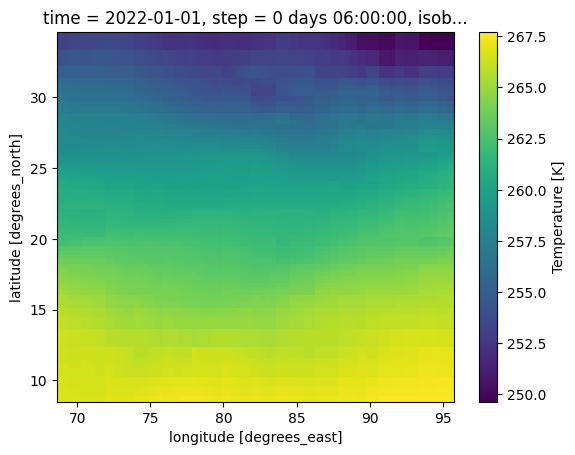

In [60]:
# sort the latitudes and longitudes inside station_forecasts
station_forecasts = station_forecasts.sortby(['latitude', 'longitude'])
station_forecasts.isel(step=1).plot()

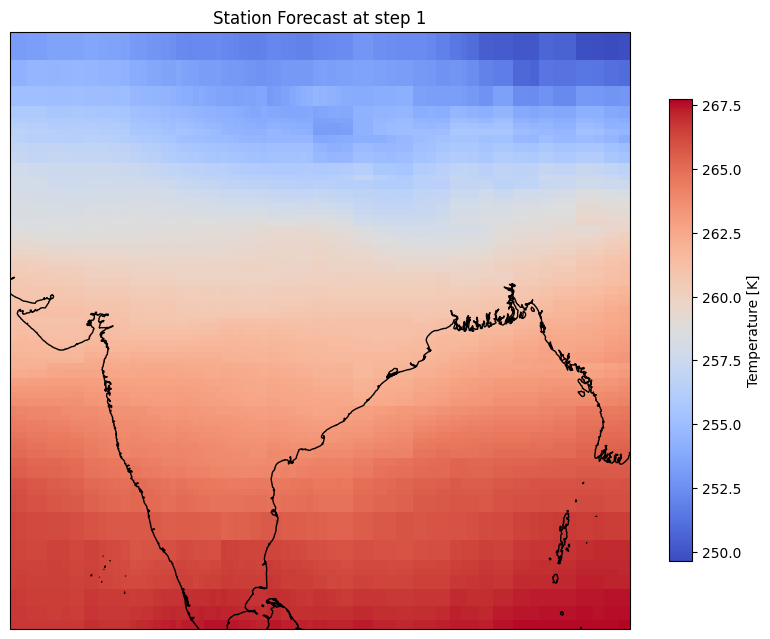

In [61]:
# on a plain map of India make a plot of the latitude longitude combinations that are there in the station_forecasts and also their values
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')

station_forecasts.isel(step=1).plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6})  
plt.title(f"Station Forecast at step 1")
plt.show()


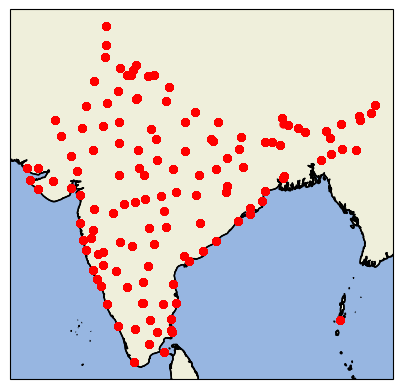

In [64]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')


for _, row in stations_df.iterrows():
    station_lat = row['LATITUDE']
    station_lon = row['LONGITUDE']
    tmax_forecast = row['TMAX']
    plt.plot(station_lon, station_lat, 'ro', markersize=5)
    # plt.text(station_lon + 0.1, station_lat, f'{tmax_forecast:.1f}', fontsize=9, ha='left')

